The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [3]:
!pip install d2l==1.0.3 --no-deps
!pip install jupyter numpy==1.23.5

  Using cached d2l-1.0.3-py3-none-any.whl.metadata (556 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.5 MB/s eta 0:00:00
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# Calculus
:label:`sec_calculus`

For a long time, how to calculate
the area of a circle remained a mystery.
Then, in Ancient Greece, the mathematician Archimedes
came up with the clever idea
to inscribe a series of polygons
with increasing numbers of vertices
on the inside of a circle
(:numref:`fig_circle_area`).
For a polygon with $n$ vertices,
we obtain $n$ triangles.
The height of each triangle approaches the radius $r$
as we partition the circle more finely.
At the same time, its base approaches $2 \pi r/n$,
since the ratio between arc and secant approaches 1
for a large number of vertices.
Thus, the area of the polygon approaches
$n \cdot r \cdot \frac{1}{2} (2 \pi r/n) = \pi r^2$.

![Finding the area of a circle as a limit procedure.](https://github.com/d2l-ai/d2l-pytorch-colab/blob/master/img/polygon-circle.svg?raw=1)
:label:`fig_circle_area`

This limiting procedure is at the root of both
*differential calculus* and *integral calculus*.
The former can tell us how to increase
or decrease a function's value by
manipulating its arguments.
This comes in handy for the *optimization problems*
that we face in deep learning,
where we repeatedly update our parameters
in order to decrease the loss function.
Optimization addresses how to fit our models to training data,
and calculus is its key prerequisite.
However, do not forget that our ultimate goal
is to perform well on *previously unseen* data.
That problem is called *generalization*
and will be a key focus of other chapters.


# 📘 The Limit Procedure in Calculus

---

## 🧠 What is a “Limit”?

A **limit** describes what a function’s value **approaches** as the input gets **closer and closer** to some number.

> Think of it as: “What is the function trying to reach, even if it never actually gets there?”

---

### 🧩 Example 1: Simple Function

\[
f(x) = 2x
\]

If we ask:

\[
\lim_{x \to 3} f(x)
\]

It means:  
“What value does `f(x)` approach when `x` gets closer and closer to 3?”

\[
f(3) = 2(3) = 6
\]

✅ Therefore,

\[
\lim_{x \to 3} 2x = 6
\]

---

### ⚙️ Example 2: Function with an Undefined Point

\[
f(x) = \frac{x^2 - 1}{x - 1}
\]

If we plug in `x = 1`:

\[
f(1) = \frac{1^2 - 1}{1 - 1} = \frac{0}{0}
\]

⚠️ This is **undefined**.

But we can still find what happens *as `x` gets close to 1*.

Simplify the function:

\[
f(x) = \frac{(x - 1)(x + 1)}{x - 1}
\]

Cancel out `(x - 1)` (for `x ≠ 1`):

\[
f(x) = x + 1
\]

Now take the limit:

\[
\lim_{x \to 1} f(x) = 1 + 1 = 2
\]

✅ So even though `f(1)` doesn’t exist,

\[
\lim_{x \to 1} f(x) = 2
\]

This is the **limit procedure** — finding what the function *approaches*, not necessarily what it *equals*.

---

## 🧩 Why Is This Important?

Because **calculus** is all about **change**, and change involves *approaching* values infinitely close to each other.

---

### 🧮 Derivatives (Instantaneous Rate of Change)

\[
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
\]

This tells us the **slope** of the function at a single point — as the difference between points (`h`) becomes *infinitely small*.

---

### 📈 Integrals (Area Under a Curve)

Integrals **add up infinitely many tiny pieces** (like rectangles) to find total area — again using limits.

---

## 🪜 Intuitive Summary

| Concept | Meaning |
|----------|----------|
| **Limit** | What a function approaches as input gets close to a certain value |
| **Purpose** | Handles “infinitely small” or “infinitely close” changes |
| **In Derivatives** | Measures instantaneous rate of change |
| **In Integrals** | Adds up infinitely small pieces to find total area |
| **In Continuity** | Ensures no sudden jumps or holes in the function |

---

## ✅ In Short

> The **limit procedure** is the process of finding what value a function is getting close to — even if it never reaches it — and it forms the **foundation of calculus**.


A "limit procedure" is a way to figure out what a function or value is heading towards as you get closer and closer to a specific point or value, without actually reaching it. Think of it like this: if you're trying to measure the area of a circle, you can draw shapes inside it that get closer and closer to filling the circle perfectly (like drawing polygons with more and more sides). As the number of sides on your polygon increases, its area gets closer and closer to the circle's area. The "limit" is that final, perfect value that the polygon's area is approaching – the true area of the circle. This idea of getting infinitely close to something is what a limit procedure is all about.

# 📘 2.4.1 Derivatives and Differentiation

---

## 🧠 What is a Derivative?

A **derivative** measures **how much a function changes** when its input changes.

> In simple terms: it’s the **rate of change** of a function.

If you slightly change the input `x`, how much does the output `f(x)` change?

---

### 🧩 Example Intuition

Think of driving a car 🚗:
- Your **position** changes over time → that’s `f(x)`.
- Your **speed** (how fast your position changes) → that’s the **derivative** `f'(x)`.

So the derivative tells us **how rapidly something changes** with respect to something else.

---

## 🧮 Formal Definition

For a function \( f(x) \) that maps from **a scalar to a scalar**, the derivative of \( f \) at a point \( x \) is defined as:

\[
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
\]

---

### ⚙️ Understanding the Formula

- \( h \) → a tiny change (perturbation) in `x`  
- \( f(x + h) - f(x) \) → the resulting change in the function’s output  
- The **ratio** \(\frac{f(x + h) - f(x)}{h}\) → tells how steep the change is  
- The **limit** \(\lim_{h \to 0}\) → asks what happens as the change in input becomes *infinitely small*

✅ This gives the **instantaneous rate of change** of the function at that point.

---

## 🧩 When Does the Derivative Exist?

When this limit exists for a particular point \( x \):
- The function is said to be **differentiable at that point.**

If it exists **for every point** on an interval (e.g., `[a, b]`):
- The function is **differentiable on that interval.**

---

### ⚠️ Not All Functions Are Differentiable

Some functions have **sharp corners** or **discontinuities** (jumps), which make the derivative undefined.

Even some performance measures we care about in machine learning — like **accuracy** or **AUC (Area Under Curve)** — are **not differentiable**.

---

### 💡 Why Derivatives Matter in Deep Learning

When training a neural network, we want to **minimize the loss function**.

The **derivative (gradient)** tells us:
- How rapidly the loss increases or decreases,
- And **which direction** (positive or negative) to adjust the parameters (weights).

Because computing derivatives is essential for optimization, we often use **differentiable surrogate loss functions** that are smooth and easy to compute gradients for (like cross-entropy or MSE).

---

## 🧮 Example for Intuition

Let’s define:
\[
f(x) = x^2
\]

Compute its derivative step by step:

\[
f'(x) = \lim_{h \to 0} \frac{(x + h)^2 - x^2}{h}
\]

Expand:
\[
= \lim_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h}
\]

Simplify:
\[
= \lim_{h \to 0} \frac{2xh + h^2}{h} = \lim_{h \to 0} (2x + h)
\]

As \( h \to 0 \):
\[
f'(x) = 2x
\]

✅ So the **derivative of \( f(x) = x^2 \)** is **\( f'(x) = 2x \)**.

This tells us:
- The slope increases as `x` increases.
- The function gets steeper as you move away from 0.

---

## 🧭 Summary

| Concept | Meaning |
|----------|----------|
| **Derivative** | The rate of change of a function |
| **Formula** | \( f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \) |
| **Interpretation** | Instantaneous rate of change or slope |
| **Differentiable** | When the derivative exists at a point |
| **In Deep Learning** | Tells how changing each weight affects the loss |
| **Example** | \( f(x) = x^2 \Rightarrow f'(x) = 2x \) |

---

## ✅ In Short

> The **derivative** measures how fast a function changes at any point.
>  
> In machine learning, it’s the mathematical tool that guides how we update weights to reduce loss.



# 🌍 How Calculus Makes Sense in Real-World Applications

---

## 🧠 What is Calculus Really About?

Calculus is the **mathematics of change** and **accumulation**.

It helps us answer two big questions:

1. **How fast is something changing?** → *Derivatives (rates of change)*
2. **How much has something accumulated?** → *Integrals (total accumulation)*

These two ideas — **change** and **accumulation** — are everywhere in real life.

---

## ⚙️ 1. Derivatives — Understanding Change

A **derivative** measures how one quantity changes in response to another.

### 🏎️ Example: Speed and Motion
- You drive 100 km in 2 hours.  
- Average speed = 50 km/h.  
- But your **instantaneous speed** (at a specific second) keeps changing.
- The **derivative of position with respect to time** gives your *speed.*

\[
v(t) = \frac{ds}{dt}
\]

If we differentiate again:
\[
a(t) = \frac{dv}{dt}
\]
That’s **acceleration** — how quickly your speed changes.

---

### 💹 Example: Business & Economics
In business, calculus helps answer:
> "If I increase the price slightly, how will revenue or profit change?"

- \( R(p) \): revenue as a function of price  
- Derivative \( R'(p) \): tells whether revenue increases or decreases as price changes  

✅ Businesses use this to **find optimal prices** that maximize profit.

---

### 🧬 Example: Biology & Medicine
- Derivatives describe **growth rates** of bacteria, cells, or populations.  
- For example, \( P'(t) \): rate at which a population changes over time.  
- In medicine, they help model **drug concentration decay** in the bloodstream.

---

### 🔋 Example: Machine Learning & AI
In training neural networks:
- The **loss function** changes as model parameters (weights) change.  
- Calculus helps find the direction & rate of change (via **gradients**).  
- Then we move weights *slightly downhill* to minimize error.  

This is called **gradient descent**, and it’s powered entirely by calculus.

---

## 🧮 2. Integrals — Understanding Accumulation

An **integral** measures total accumulation of small quantities.

### 🌊 Example: Distance from Speed
If you know your speed at every second \( v(t) \),
you can find **total distance traveled** by integrating:

\[
s = \int v(t) \, dt
\]

It’s like **adding up infinitely many tiny distances**.

---

### 💰 Example: Economics & Finance
- Integrate cash flow to find **total revenue** over time.
- Compute **consumer surplus** or **investment growth** using area under curves.

---

### ⚡ Example: Engineering & Physics
- Integrals calculate **area, volume, work, energy, charge**, etc.
- Derivatives describe **motion, heat, electricity, pressure**, and more.

For instance:
\[
F = m \cdot a \quad \text{and} \quad a = \frac{dv}{dt}
\]

By integrating acceleration, you get velocity.  
By integrating velocity, you get position.

---

## 🧩 3. Why It All Makes Sense

| Concept | What It Means | Real-World Role |
|----------|----------------|----------------|
| **Derivative** | Rate of change | Measures how things evolve instantly |
| **Integral** | Total accumulation | Adds up continuous quantities |
| **Limit** | Infinitely small steps | Bridges discrete → continuous change |
| **Optimization** | Finding max/min | Used in ML, finance, logistics, design |

---

## 🧭 4. Intuitive Analogy

Imagine a roller coaster 🎢:

- The **slope** at each point → derivative → tells how steep (fast) it’s going.  
- The **total track length** → integral → adds up all small path pieces.

Together, calculus helps us **describe and predict continuous behavior** — in physics, biology, economics, AI, and even art or music!

---

## ✅ In Short

> Calculus is the language the universe uses to describe **change** and **accumulation**.  
>  
> It turns “what if” questions about motion, growth, learning, and optimization  
> into precise mathematical answers — powering **science, technology, and intelligence** itself.

---


In [4]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## Derivatives and Differentiation

Put simply, a *derivative* is the rate of change
in a function with respect to changes in its arguments.
Derivatives can tell us how rapidly a loss function
would increase or decrease were we
to *increase* or *decrease* each parameter
by an infinitesimally small amount.
Formally, for functions $f: \mathbb{R} \rightarrow \mathbb{R}$,
that map from scalars to scalars,
[**the *derivative* of $f$ at a point $x$ is defined as**]

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`

This term on the right hand side is called a *limit*
and it tells us what happens
to the value of an expression
as a specified variable
approaches a particular value.
This limit tells us what
the ratio between a perturbation $h$
and the change in the function value
$f(x + h) - f(x)$ converges to
as we shrink its size to zero.

When $f'(x)$ exists, $f$ is said
to be *differentiable* at $x$;
and when $f'(x)$ exists for all $x$
on a set, e.g., the interval $[a,b]$,
we say that $f$ is differentiable on this set.
Not all functions are differentiable,
including many that we wish to optimize,
such as accuracy and the area under the
receiving operating characteristic (AUC).
However, because computing the derivative of the loss
is a crucial step in nearly all
algorithms for training deep neural networks,
we often optimize a differentiable *surrogate* instead.


We can interpret the derivative
$f'(x)$
as the *instantaneous* rate of change
of $f(x)$ with respect to $x$.
Let's develop some intuition with an example.
(**Define $u = f(x) = 3x^2-4x$.**)


In [10]:
def f(x):
    return 3 * x ** 2 - 4 * x # Define the function f(x)

[**Setting $x=1$, we see that $\frac{f(x+h) - f(x)}{h}$**] (**approaches $2$
as $h$ approaches $0$.**)
While this experiment lacks
the rigor of a mathematical proof,
we can quickly see that indeed $f'(1) = 2$.


In [11]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


There are several equivalent notational conventions for derivatives.
Given $y = f(x)$, the following expressions are equivalent:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where the symbols $\frac{d}{dx}$ and $D$ are *differentiation operators*.
Below, we present the derivatives of some common functions:

$$\begin{aligned} \frac{d}{dx} C & = 0 && \textrm{for any constant $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \textrm{for } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1}. \end{aligned}$$

Functions composed from differentiable functions
are often themselves differentiable.
The following rules come in handy
for working with compositions
of any differentiable functions
$f$ and $g$, and constant $C$.

$$\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{Constant multiple rule} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{Sum rule} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{Product rule} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{Quotient rule} \end{aligned}$$

Using this, we can apply the rules
to find the derivative of $3 x^2 - 4x$ via

$$\frac{d}{dx} [3 x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4.$$

Plugging in $x = 1$ shows that, indeed,
the derivative equals $2$ at this location.
Note that derivatives tell us
the *slope* of a function
at a particular location.  

## Visualization Utilities

[**We can visualize the slopes of functions using the `matplotlib` library**].
We need to define a few functions.
As its name indicates, `use_svg_display`
tells `matplotlib` to output graphics
in SVG format for crisper images.
The comment `#@save` is a special modifier
that allows us to save any function,
class, or other code block to the `d2l` package
so that we can invoke it later
without repeating the code,
e.g., via `d2l.use_svg_display()`.


In [5]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

Conveniently, we can set figure sizes with `set_figsize`.
Since the import statement `from matplotlib import pyplot as plt`
was marked via `#@save` in the `d2l` package, we can call `d2l.plt`.


In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

The `set_axes` function can associate axes
with properties, including labels, ranges,
and scales.


In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

With these three functions, we can define a `plot` function
to overlay multiple curves.
Much of the code here is just ensuring
that the sizes and shapes of inputs match.


In [8]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Now we can [**plot the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$**],
where the coefficient $2$ is the slope of the tangent line.


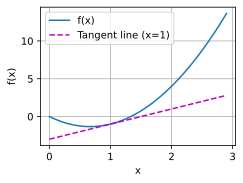

In [12]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial Derivatives and Gradients
:label:`subsec_calculus-grad`

Thus far, we have been differentiating
functions of just one variable.
In deep learning, we also need to work
with functions of *many* variables.
We briefly introduce notions of the derivative
that apply to such *multivariate* functions.


Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables.
The *partial derivative* of $y$
with respect to its $i^\textrm{th}$ parameter $x_i$ is

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$


To calculate $\frac{\partial y}{\partial x_i}$,
we can treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants
and calculate the derivative of $y$ with respect to $x_i$.
The following notational conventions for partial derivatives
are all common and all mean the same thing:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

We can concatenate partial derivatives
of a multivariate function
with respect to all its variables
to obtain a vector that is called
the *gradient* of the function.
Suppose that the input of function
$f: \mathbb{R}^n \rightarrow \mathbb{R}$
is an $n$-dimensional vector
$\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$
and the output is a scalar.
The gradient of the function $f$
with respect to $\mathbf{x}$
is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$

When there is no ambiguity,
$\nabla_{\mathbf{x}} f(\mathbf{x})$
is typically replaced
by $\nabla f(\mathbf{x})$.
The following rules come in handy
for differentiating multivariate functions:

* For all $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$ and $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$.
* For square matrices $\mathbf{A} \in \mathbb{R}^{n \times n}$ we have that $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$ and in particular
$\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$.

Similarly, for any matrix $\mathbf{X}$,
we have $\nabla_{\mathbf{X}} \|\mathbf{X} \|_\textrm{F}^2 = 2\mathbf{X}$.



## Chain Rule

In deep learning, the gradients of concern
are often difficult to calculate
because we are working with
deeply nested functions
(of functions (of functions...)).
Fortunately, the *chain rule* takes care of this.
Returning to functions of a single variable,
suppose that $y = f(g(x))$
and that the underlying functions
$y=f(u)$ and $u=g(x)$
are both differentiable.
The chain rule states that


$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$



Turning back to multivariate functions,
suppose that $y = f(\mathbf{u})$ has variables
$u_1, u_2, \ldots, u_m$,
where each $u_i = g_i(\mathbf{x})$
has variables $x_1, x_2, \ldots, x_n$,
i.e.,  $\mathbf{u} = g(\mathbf{x})$.
Then the chain rule states that

$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ and so } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,$$

where $\mathbf{A} \in \mathbb{R}^{n \times m}$ is a *matrix*
that contains the derivative of vector $\mathbf{u}$
with respect to vector $\mathbf{x}$.
Thus, evaluating the gradient requires
computing a vector--matrix product.
This is one of the key reasons why linear algebra
is such an integral building block
in building deep learning systems.



## Discussion

While we have just scratched the surface of a deep topic,
a number of concepts already come into focus:
first, the composition rules for differentiation
can be applied routinely, enabling
us to compute gradients *automatically*.
This task requires no creativity and thus
we can focus our cognitive powers elsewhere.
Second, computing the derivatives of vector-valued functions
requires us to multiply matrices as we trace
the dependency graph of variables from output to input.
In particular, this graph is traversed in a *forward* direction
when we evaluate a function
and in a *backwards* direction
when we compute gradients.
Later chapters will formally introduce backpropagation,
a computational procedure for applying the chain rule.

From the viewpoint of optimization, gradients allow us
to determine how to move the parameters of a model
in order to lower the loss,
and each step of the optimization algorithms used
throughout this book will require calculating the gradient.

## Exercises

1. So far we took the rules for derivatives for granted.
   Using the definition and limits prove the properties
   for (i) $f(x) = c$, (ii) $f(x) = x^n$, (iii) $f(x) = e^x$ and (iv) $f(x) = \log x$.
1. In the same vein, prove the product, sum, and quotient rule from first principles.
1. Prove that the constant multiple rule follows as a special case of the product rule.
1. Calculate the derivative of $f(x) = x^x$.
1. What does it mean that $f'(x) = 0$ for some $x$?
   Give an example of a function $f$
   and a location $x$ for which this might hold.
1. Plot the function $y = f(x) = x^3 - \frac{1}{x}$
   and plot its tangent line at $x = 1$.
1. Find the gradient of the function
   $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.
1. What is the gradient of the function
   $f(\mathbf{x}) = \|\mathbf{x}\|_2$? What happens for $\mathbf{x} = \mathbf{0}$?
1. Can you write out the chain rule for the case
   where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?
1. Given a function $f(x)$ that is invertible,
   compute the derivative of its inverse $f^{-1}(x)$.
   Here we have that $f^{-1}(f(x)) = x$ and conversely $f(f^{-1}(y)) = y$.
   Hint: use these properties in your derivation.


### Exercise 10: Given a function $f(x)$ that is invertible, compute the derivative of its inverse $f^{-1}(x)$. Here we have that $f^{-1}(f(x)) = x$ and conversely $f(f^{-1}(y)) = y$. Hint: use these properties in your derivation.

Let $y = f(x)$, so $x = f^{-1}(y)$. We want to find the derivative of the inverse function, which is $\frac{d}{dy} f^{-1}(y)$.

We are given the property $f(f^{-1}(y)) = y$.
We can differentiate both sides of this equation with respect to $y$.
On the left side, we use the chain rule. Let $u = f^{-1}(y)$. Then the left side is $f(u)$. The derivative with respect to $y$ is:
$$ \frac{d}{dy} [f(f^{-1}(y))] = \frac{d}{du} f(u) \cdot \frac{du}{dy} = f'(u) \cdot \frac{d}{dy} f^{-1}(y) $$
Substitute back $u = f^{-1}(y)$:
$$ \frac{d}{dy} [f(f^{-1}(y))] = f'(f^{-1}(y)) \cdot \frac{d}{dy} f^{-1}(y) $$
On the right side, the derivative of $y$ with respect to $y$ is simply 1:
$$ \frac{d}{dy} [y] = 1 $$
Equating the derivatives of both sides:
$$ f'(f^{-1}(y)) \cdot \frac{d}{dy} f^{-1}(y) = 1 $$
Now, solve for $\frac{d}{dy} f^{-1}(y)$:
$$ \frac{d}{dy} f^{-1}(y) = \frac{1}{f'(f^{-1}(y))} $$

Alternatively, using the property $f^{-1}(f(x)) = x$, we can differentiate with respect to $x$:
Let $v = f(x)$. Then the left side is $f^{-1}(v)$. The derivative with respect to $x$ is:
$$ \frac{d}{dx} [f^{-1}(f(x))] = \frac{d}{dv} f^{-1}(v) \cdot \frac{dv}{dx} = (f^{-1})'(v) \cdot f'(x) $$
Substitute back $v = f(x)$:
$$ \frac{d}{dx} [f^{-1}(f(x))] = (f^{-1})'(f(x)) \cdot f'(x) $$
On the right side, the derivative of $x$ with respect to $x$ is 1:
$$ \frac{d}{dx} [x] = 1 $$
Equating the derivatives of both sides:
$$ (f^{-1})'(f(x)) \cdot f'(x) = 1 $$
Solve for $(f^{-1})'(f(x))$:
$$ (f^{-1})'(f(x)) = \frac{1}{f'(x)} $$
Let $y = f(x)$, then $x = f^{-1}(y)$. Substituting this into the equation:
$$ (f^{-1})'(y) = \frac{1}{f'(f^{-1}(y))} $$
This gives the derivative of the inverse function at the point $y$. If we want the derivative in terms of $x$, we can use the first form derived:
$$ \frac{d}{dx} f^{-1}(y) = \frac{1}{f'(f^{-1}(y))} $$
where $y$ is the input to the inverse function.

Thus, the derivative of the inverse function $f^{-1}(y)$ with respect to $y$ is the reciprocal of the derivative of the original function $f$ evaluated at the inverse of $y$.

### Exercise 9: Can you write out the chain rule for the case where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?

Given $u = f(x, y, z)$, where $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$, we want to find the partial derivatives of $u$ with respect to $a$ and $b$ using the chain rule.

The chain rule for this case states that to find the partial derivative of $u$ with respect to $a$, we sum the products of the partial derivative of $u$ with respect to each intermediate variable ($x, y, z$) and the partial derivative of that intermediate variable with respect to $a$:

$$ \frac{\partial u}{\partial a} = \frac{\partial u}{\partial x} \frac{\partial x}{\partial a} + \frac{\partial u}{\partial y} \frac{\partial y}{\partial a} + \frac{\partial u}{\partial z} \frac{\partial z}{\partial a} $$

Similarly, to find the partial derivative of $u$ with respect to $b$, we sum the products of the partial derivative of $u$ with respect to each intermediate variable ($x, y, z$) and the partial derivative of that intermediate variable with respect to $b$:

$$ \frac{\partial u}{\partial b} = \frac{\partial u}{\partial x} \frac{\partial x}{\partial b} + \frac{\partial u}{\partial y} \frac{\partial y}{\partial b} + \frac{\partial u}{\partial z} \frac{\partial z}{\partial b} $$

These two equations represent the application of the chain rule for the given function composition.

### Exercise 8: What is the gradient of the function $f(\mathbf{x}) = \|\mathbf{x}\|_2$? What happens for $\mathbf{x} = \mathbf{0}$?

The function is $f(\mathbf{x}) = \|\mathbf{x}\|_2$. The L2 norm of a vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ is defined as:
$$ \|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} = \sqrt{\mathbf{x}^\top \mathbf{x}} $$
To find the gradient, we need to compute the partial derivative with respect to each $x_i$:
$$ \frac{\partial}{\partial x_i} \|\mathbf{x}\|_2 = \frac{\partial}{\partial x_i} \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} $$
Using the chain rule, let $u = x_1^2 + x_2^2 + \ldots + x_n^2$. Then the function is $\sqrt{u}$.
$$ \frac{\partial}{\partial x_i} \sqrt{u} = \frac{d}{du} (\sqrt{u}) \cdot \frac{\partial u}{\partial x_i} $$
The derivative of $\sqrt{u}$ with respect to $u$ is $\frac{1}{2\sqrt{u}}$.
$$ \frac{d}{du} (\sqrt{u}) = \frac{1}{2\sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}} = \frac{1}{2\|\mathbf{x}\|_2} $$
The partial derivative of $u$ with respect to $x_i$ is:
$$ \frac{\partial u}{\partial x_i} = \frac{\partial}{\partial x_i} (x_1^2 + x_2^2 + \ldots + x_n^2) = 2x_i $$
Combining these using the chain rule:
$$ \frac{\partial}{\partial x_i} \|\mathbf{x}\|_2 = \frac{1}{2\|\mathbf{x}\|_2} \cdot 2x_i = \frac{x_i}{\|\mathbf{x}\|_2} $$
The gradient of $f(\mathbf{x}) = \|\mathbf{x}\|_2$ is the vector of these partial derivatives:
$$ \nabla f(\mathbf{x}) = \left[\frac{x_1}{\|\mathbf{x}\|_2}, \frac{x_2}{\|\mathbf{x}\|_2}, \ldots, \frac{x_n}{\|\mathbf{x}\|_2}\right]^\top = \frac{1}{\|\mathbf{x}\|_2} [x_1, x_2, \ldots, x_n]^\top = \frac{\mathbf{x}}{\|\mathbf{x}\|_2} $$
This is the unit vector in the direction of $\mathbf{x}$.

**What happens for $\mathbf{x} = \mathbf{0}$?**

At $\mathbf{x} = \mathbf{0}$, the L2 norm $\|\mathbf{0}\|_2 = 0$. The expression for the gradient, $\frac{\mathbf{x}}{\|\mathbf{x}\|_2}$, involves division by zero, which is undefined.
Therefore, the gradient of $f(\mathbf{x}) = \|\mathbf{x}\|_2$ is **undefined** at $\mathbf{x} = \mathbf{0}$. This is because the function has a sharp point (a "cone") at the origin, and the derivative (and thus the gradient) does not exist at such points.

### Exercise 7: Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.

To find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$, where $\mathbf{x} = [x_1, x_2]^\top$, we need to compute the partial derivatives with respect to each variable $x_1$ and $x_2$.

The partial derivative with respect to $x_1$ is found by treating $x_2$ as a constant:
$$ \frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1} (3x_1^2 + 5e^{x_2}) $$
Using the sum rule and the constant multiple rule:
$$ \frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1} (3x_1^2) + \frac{\partial}{\partial x_1} (5e^{x_2}) $$
For the first term, using the power rule $\frac{d}{dx} x^n = nx^{n-1}$:
$$ \frac{\partial}{\partial x_1} (3x_1^2) = 3 \cdot 2x_1^{2-1} = 6x_1 $$
For the second term, since $e^{x_2}$ is treated as a constant with respect to $x_1$, its derivative is 0:
$$ \frac{\partial}{\partial x_1} (5e^{x_2}) = 0 $$
So, the partial derivative with respect to $x_1$ is:
$$ \frac{\partial f}{\partial x_1} = 6x_1 $$

The partial derivative with respect to $x_2$ is found by treating $x_1$ as a constant:
$$ \frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2} (3x_1^2 + 5e^{x_2}) $$
Using the sum rule and the constant multiple rule:
$$ \frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2} (3x_1^2) + \frac{\partial}{\partial x_2} (5e^{x_2}) $$
For the first term, since $3x_1^2$ is treated as a constant with respect to $x_2$, its derivative is 0:
$$ \frac{\partial}{\partial x_2} (3x_1^2) = 0 $$
For the second term, using the derivative of the exponential function $\frac{d}{dx} e^x = e^x$:
$$ \frac{\partial}{\partial x_2} (5e^{x_2}) = 5 \frac{\partial}{\partial x_2} (e^{x_2}) = 5e^{x_2} $$
So, the partial derivative with respect to $x_2$ is:
$$ \frac{\partial f}{\partial x_2} = 5e^{x_2} $$

The gradient of the function $f(\mathbf{x})$ is the vector of these partial derivatives:
$$ \nabla f(\mathbf{x}) = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}\right]^\top = [6x_1, 5e^{x_2}]^\top $$

Thus, the gradient of $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$ is $\nabla f(\mathbf{x}) = [6x_1, 5e^{x_2}]^\top$.

### Exercise 6: Plot the function $y = f(x) = x^3 - \frac{1}{x}$ and plot its tangent line at $x = 1$.

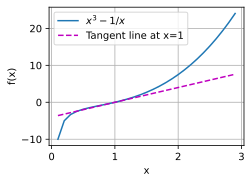

In [26]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import matplotlib.pyplot as plt

# Define the function
def f_ex6(x):
    return x**3 - 1/x

# Calculate the derivative of the function
# f'(x) = 3x^2 + 1/x^2
def df_ex6(x):
    return 3 * x**2 + 1/x**2

# Point of tangency
x_tangent = 1
y_tangent = f_ex6(x_tangent)
slope_tangent = df_ex6(x_tangent)

# Equation of the tangent line: y - y1 = m(x - x1)
# y = m(x - x1) + y1
# y = slope_tangent * (x - x_tangent) + y_tangent
def tangent_line_ex6(x):
    return slope_tangent * (x - x_tangent) + y_tangent

# Generate x values for plotting
x_values = np.arange(0.1, 3, 0.1) # Start from a small positive value to avoid division by zero

# Plot the function and the tangent line
d2l.set_figsize()
d2l.plot(x_values, [f_ex6(x_values), tangent_line_ex6(x_values)], 'x', 'f(x)',
         legend=['$x^3 - 1/x$', 'Tangent line at x=1'])

### Exercise 5: What does it mean that $f'(x) = 0$ for some $x$? Give an example.

When the derivative of a function $f'(x)$ is equal to 0 at a specific point $x$, it means that the instantaneous rate of change of the function at that point is zero. Geometrically, this means that the tangent line to the graph of the function at that point is horizontal.

Points where the derivative is zero are often called **critical points**. These points can correspond to local maximums, local minimums, or saddle points of the function. At these points, the function is momentarily neither increasing nor decreasing.

**Example:**

Consider the function $f(x) = x^2$.
The derivative of this function is $f'(x) = 2x$.

We want to find where $f'(x) = 0$:
$$ 2x = 0 $$
$$ x = 0 $$

So, for the function $f(x) = x^2$, the derivative is zero at $x = 0$.

Let's look at the graph of $f(x) = x^2$:
The graph is a parabola that opens upwards. At $x = 0$, the function reaches its minimum value. The tangent line at this point is a horizontal line along the x-axis, and its slope is 0. This confirms that $f'(0) = 0$ at the location of the minimum.

### Exercise 4: Calculate the derivative of $f(x) = x^x$

To calculate the derivative of $f(x) = x^x$, we can use logarithmic differentiation.

Let $y = x^x$.
Take the natural logarithm of both sides:
$$ \ln y = \ln(x^x) $$
Using the property of logarithms ($\ln(a^b) = b \ln a$):
$$ \ln y = x \ln x $$
Now, differentiate both sides with respect to $x$. On the left side, we use the chain rule:
$$ \frac{1}{y} \frac{dy}{dx} = \frac{d}{dx} (x \ln x) $$
On the right side, we use the product rule $\frac{d}{dx} [u(x)v(x)] = u'(x)v(x) + u(x)v'(x)$, where $u(x) = x$ and $v(x) = \ln x$.
$$ \frac{d}{dx} (x) = 1 $$
$$ \frac{d}{dx} (\ln x) = \frac{1}{x} $$
So, applying the product rule:
$$ \frac{d}{dx} (x \ln x) = (1)(\ln x) + (x)\left(\frac{1}{x}\right) = \ln x + 1 $$
Now substitute this back into the differentiated equation:
$$ \frac{1}{y} \frac{dy}{dx} = \ln x + 1 $$
Finally, solve for $\frac{dy}{dx}$ by multiplying both sides by $y$:
$$ \frac{dy}{dx} = y (\ln x + 1) $$
Substitute back $y = x^x$:
$$ \frac{dy}{dx} = x^x (\ln x + 1) $$

Thus, the derivative of $f(x) = x^x$ is $f'(x) = x^x (\ln x + 1)$.

### Exercise 3: Proving the Constant Multiple Rule from the Product Rule

The product rule states that for two differentiable functions $f(x)$ and $g(x)$:
$$ \frac{d}{dx} [f(x) g(x)] = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) $$
The constant multiple rule states that for a differentiable function $f(x)$ and a constant $C$:
$$ \frac{d}{dx} [C f(x)] = C \frac{d}{dx} f(x) $$

To prove the constant multiple rule using the product rule, let $g(x) = C$, where $C$ is a constant.
Then, apply the product rule to the function $C f(x)$:
$$ \frac{d}{dx} [C f(x)] = C \frac{d}{dx} f(x) + f(x) \frac{d}{dx} C $$
From Exercise 1(i), we know that the derivative of a constant is 0, i.e., $\frac{d}{dx} C = 0$.
Substitute this into the equation:
$$ \frac{d}{dx} [C f(x)] = C \frac{d}{dx} f(x) + f(x) \cdot 0 $$
$$ \frac{d}{dx} [C f(x)] = C \frac{d}{dx} f(x) $$
Thus, the constant multiple rule is proven as a special case of the product rule.

### Exercise 1: Proving Derivative Properties from the Definition

The definition of the derivative of a function $f(x)$ is:
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

**(i) $f(x) = c$ (where $c$ is a constant)**

Using the definition:
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} = \lim_{h \rightarrow 0} \frac{c - c}{h} = \lim_{h \rightarrow 0} \frac{0}{h} = \lim_{h \rightarrow 0} 0 = 0$$
Thus, the derivative of a constant is 0.

**(ii) $f(x) = x^n$ (for $n \neq 0$)**

Using the definition and the binomial expansion $(x+h)^n = x^n + nx^{n-1}h + \frac{n(n-1)}{2}x^{n-2}h^2 + \ldots + h^n$:
$$f'(x) = \lim_{h \rightarrow 0} \frac{(x+h)^n - x^n}{h} = \lim_{h \rightarrow 0} \frac{(x^n + nx^{n-1}h + \frac{n(n-1)}{2}x^{n-2}h^2 + \ldots + h^n) - x^n}{h}$$
$$f'(x) = \lim_{h \rightarrow 0} \frac{nx^{n-1}h + \frac{n(n-1)}{2}x^{n-2}h^2 + \ldots + h^n}{h}$$
$$f'(x) = \lim_{h \rightarrow 0} (nx^{n-1} + \frac{n(n-1)}{2}x^{n-2}h + \ldots + h^{n-1})$$
As $h \rightarrow 0$, all terms with $h$ go to zero:
$$f'(x) = nx^{n-1}$$
Thus, the derivative of $x^n$ is $nx^{n-1}$.

**(iii) $f(x) = e^x$**

Using the definition and the property $\lim_{h \rightarrow 0} \frac{e^h - 1}{h} = 1$:
$$f'(x) = \lim_{h \rightarrow 0} \frac{e^{x+h} - e^x}{h} = \lim_{h \rightarrow 0} \frac{e^x e^h - e^x}{h} = \lim_{h \rightarrow 0} e^x \frac{e^h - 1}{h}$$
$$f'(x) = e^x \lim_{h \rightarrow 0} \frac{e^h - 1}{h} = e^x \cdot 1 = e^x$$
Thus, the derivative of $e^x$ is $e^x$.

**(iv) $f(x) = \ln x$**

Using the definition and the property $\lim_{h \rightarrow 0} \frac{\ln(1+h)}{h} = 1$:
$$f'(x) = \lim_{h \rightarrow 0} \frac{\ln(x+h) - \ln x}{h} = \lim_{h \rightarrow 0} \frac{\ln(\frac{x+h}{x})}{h} = \lim_{h \rightarrow 0} \frac{\ln(1 + \frac{h}{x})}{h}$$
Let $k = \frac{h}{x}$. As $h \rightarrow 0$, $k \rightarrow 0$. Also, $h = kx$.
$$f'(x) = \lim_{k \rightarrow 0} \frac{\ln(1 + k)}{kx} = \lim_{k \rightarrow 0} \frac{1}{x} \cdot \frac{\ln(1 + k)}{k}$$
$$f'(x) = \frac{1}{x} \lim_{k \rightarrow 0} \frac{\ln(1 + k)}{k} = \frac{1}{x} \cdot 1 = \frac{1}{x}$$
Thus, the derivative of $\ln x$ is $\frac{1}{x}$.

### Exercise 2: Proving Product, Sum, and Quotient Rules

The definition of the derivative of a function $f(x)$ is:
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

**(i) Sum Rule: $\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x)$**

Let $H(x) = f(x) + g(x)$. Using the definition of the derivative:
$$H'(x) = \lim_{h \rightarrow 0} \frac{H(x+h) - H(x)}{h} = \lim_{h \rightarrow 0} \frac{[f(x+h) + g(x+h)] - [f(x) + g(x)]}{h}$$
$$H'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x) + g(x+h) - g(x)}{h} = \lim_{h \rightarrow 0} \left( \frac{f(x+h) - f(x)}{h} + \frac{g(x+h) - g(x)}{h} \right)$$
Since the limit of a sum is the sum of the limits (if they exist):
$$H'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} + \lim_{h \rightarrow 0} \frac{g(x+h) - g(x)}{h} = f'(x) + g'(x)$$
Thus, the sum rule is proven.

**(ii) Product Rule: $\frac{d}{dx} [f(x) g(x)] = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x)$**

Let $P(x) = f(x) g(x)$. Using the definition of the derivative and adding and subtracting $f(x+h)g(x)$ in the numerator:
$$P'(x) = \lim_{h \rightarrow 0} \frac{P(x+h) - P(x)}{h} = \lim_{h \rightarrow 0} \frac{f(x+h) g(x+h) - f(x) g(x)}{h}$$
$$P'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) g(x+h) - f(x+h) g(x) + f(x+h) g(x) - f(x) g(x)}{h}$$
$$P'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) [g(x+h) - g(x)] + g(x) [f(x+h) - f(x)]}{h}$$
$$P'(x) = \lim_{h \rightarrow 0} \left( f(x+h) \frac{g(x+h) - g(x)}{h} + g(x) \frac{f(x+h) - f(x)}{h} \right)$$
Since $\lim_{h \rightarrow 0} f(x+h) = f(x)$ (because f is differentiable, it must be continuous), and using the property that the limit of a product is the product of the limits:
$$P'(x) = \lim_{h \rightarrow 0} f(x+h) \cdot \lim_{h \rightarrow 0} \frac{g(x+h) - g(x)}{h} + \lim_{h \rightarrow 0} g(x) \cdot \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
$$P'(x) = f(x) g'(x) + g(x) f'(x)$$
Thus, the product rule is proven.

**(iii) Quotient Rule: $\frac{d}{dx} \frac{f(x)}{g(x)} = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)}$ (where $g(x) \neq 0$)**

Let $Q(x) = \frac{f(x)}{g(x)}$. Using the definition of the derivative and a common algebraic manipulation:
$$Q'(x) = \lim_{h \rightarrow 0} \frac{Q(x+h) - Q(x)}{h} = \lim_{h \rightarrow 0} \frac{\frac{f(x+h)}{g(x+h)} - \frac{f(x)}{g(x)}}{h}$$
$$Q'(x) = \lim_{h \rightarrow 0} \frac{\frac{f(x+h)g(x) - f(x)g(x+h)}{g(x+h)g(x)}}{h} = \lim_{h \rightarrow 0} \frac{f(x+h)g(x) - f(x)g(x+h)}{h g(x+h)g(x)}$$
Add and subtract $f(x)g(x)$ in the numerator:
$$Q'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)g(x) - f(x)g(x) + f(x)g(x) - f(x)g(x+h)}{h g(x+h)g(x)}$$
$$Q'(x) = \lim_{h \rightarrow 0} \frac{g(x)[f(x+h) - f(x)] - f(x)[g(x+h) - g(x)]}{h g(x+h)g(x)}$$
$$Q'(x) = \lim_{h \rightarrow 0} \frac{1}{g(x+h)g(x)} \left( g(x) \frac{f(x+h) - f(x)}{h} - f(x) \frac{g(x+h) - g(x)}{h} \right)$$
Since $\lim_{h \rightarrow 0} g(x+h) = g(x)$ (because g is differentiable, it must be continuous), and using the properties of limits:
$$Q'(x) = \frac{1}{g(x)g(x)} \left( g(x) \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} - f(x) \lim_{h \rightarrow 0} \frac{g(x+h) - g(x)}{h} \right)$$
$$Q'(x) = \frac{g(x)f'(x) - f(x)g'(x)}{[g(x)]^2}$$
Thus, the quotient rule is proven.

[Discussions](https://discuss.d2l.ai/t/33)
